In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, ifft, fftfreq
import scipy

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
def get_cos_singal(f=[50,150,450], fs=10000, A=2.0, a=-1, b=1, noise=None):
    t = np.linspace(a, b, fs)
    omegas = [2 * np.pi * f_curr for f_curr in f]
    x_cos = np.sum([A * np.cos(omega * t) for omega in omegas], axis=0)
    if noise:
        for i in range(len(x_cos)):
            x_cos[i] += (np.random.rand() * noise)
    return t, x_cos

In [3]:
def get_impulse(a=0.0, b=20.0, A=1, period=7.5, fc = 10_000, noise=None):
    t = np.linspace(a, b, fc)
    signal = np.array([(A if ti % (period * 2) >= period else 0) for ti in t])
    if noise:
        for i in range(len(signal)):
            signal[i] += (np.random.rand() * noise)
    return t, signal

# 1.

In [6]:
def morle_func(x, alpha):
    return np.exp(-(x)**2 / alpha**2) * np.exp(1j * x * 2 * np.pi)

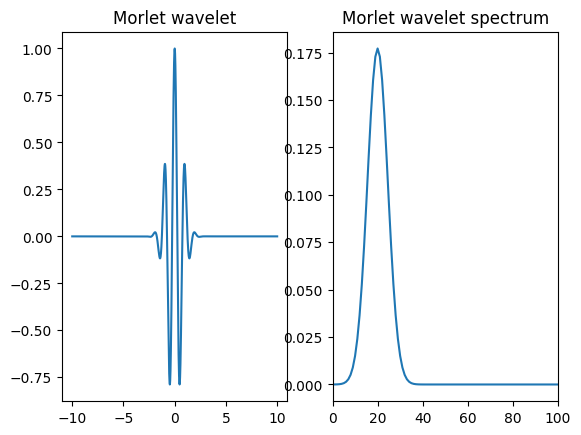

In [22]:
t = np.linspace(-10, 10, 10000)
morle = morle_func(t, 1)

frequencies = np.arange(len(t))
morle_fft = np.fft.fft(morle) / len(t)

plt.subplot(1, 2, 1)
plt.plot(t, morle)
plt.title('Morlet wavelet')

plt.subplot(1, 2, 2)
plt.plot(frequencies, 2 * np.abs(morle_fft))
plt.xlim(0, 100)
plt.title('Morlet wavelet spectrum')

plt.show()

# 2.

In [25]:
def mexican_hat_func(x, alpha):
    return (1 - x**2) * np.exp(-x**2 / 2)

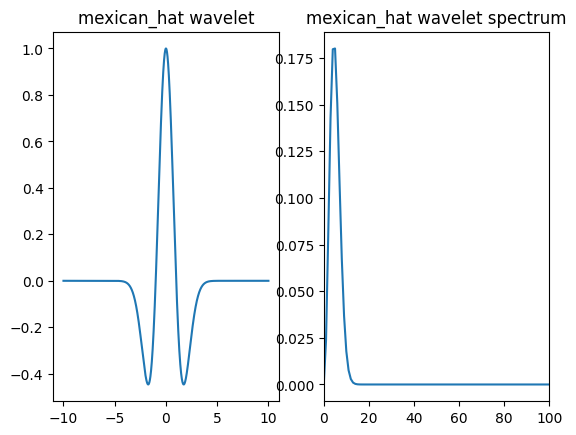

In [26]:
t = np.linspace(-10, 10, 10000)
mexican_hat = mexican_hat_func(t, 1)

frequencies = np.arange(len(t))
mexican_hat_fft = np.fft.fft(mexican_hat) / len(t)

plt.subplot(1, 2, 1)
plt.plot(t, mexican_hat)
plt.title('mexican_hat wavelet')

plt.subplot(1, 2, 2)
plt.plot(frequencies, 2 * np.abs(mexican_hat_fft))
plt.xlim(0, 100)
plt.title('mexican_hat wavelet spectrum')

plt.show()

# 3.

In [42]:
def haar_func(x, alpha):
    haar = np.zeros(len(t))
    x = x / alpha
    for i, xi in enumerate(x):
        if 0 <= xi and xi < 0.5:
            haar[i] = 1
        if 0.5 <= xi and xi < 1:
            haar[i] = -1
    return (1 / np.sqrt(alpha)) * haar

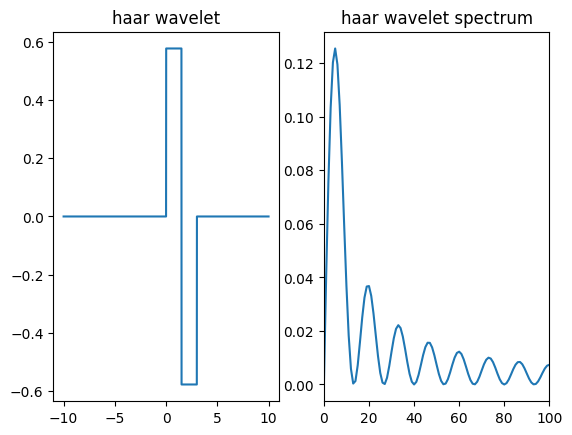

In [55]:
t = np.linspace(-10, 10, 10000)
haar = haar_func(t, 3)

frequencies = np.arange(len(t))
haar_fft = np.fft.fft(haar) / len(t)

plt.subplot(1, 2, 1)
plt.plot(t, haar)
#plt.xlim(-1, 2)
plt.title('haar wavelet')

plt.subplot(1, 2, 2)
plt.plot(frequencies, 2 * np.abs(haar_fft))
plt.xlim(0, 100)
plt.title('haar wavelet spectrum')

plt.show()

# 4.

In [57]:
def my_conv(signal, wavelet):
    return np.fft.ifft(np.fft.fft(signal) * np.fft.fft(wavelet))

In [155]:
def get_sin_signal(f, fc, A, a, b, noise=None):
    t = np.linspace(a, b, fc)
    w = 2 * np.pi * f
    signal = A * np.sin(t * w)
    if noise:
        signal += np.random.normal(0, 1, t.shape) * noise
    return t, signal

In [156]:
#t, signal = get_cos_singal(f=[5,15], fs=10000, A=2.0, a=0, b=1, noise=10)
t, signal = get_sin_signal(5, fc=10000, A=2.0, a=-1, b=1, noise=0.5)

morle = morle_func(t, 0.9)
mexican_hat = mexican_hat_func(t, 0.01)
haar = haar_func(t, 3)

morle_conv_signal = my_conv(signal, morle) / (max(signal)/max(morle))
mexican_hat_conv_signal = my_conv(signal, mexican_hat) / (max(signal)/max(mexican_hat))
haar_hat_conv_signal = my_conv(signal, haar) / (max(signal)/max(haar))

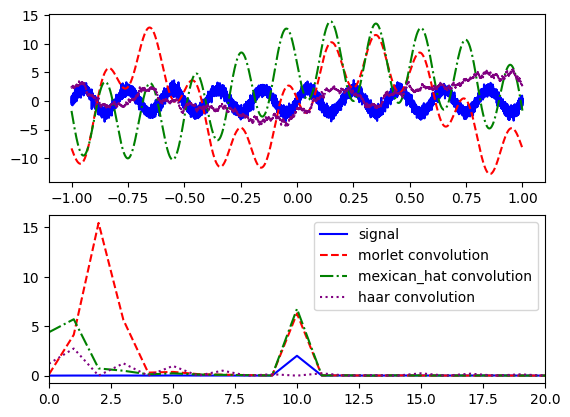

In [158]:
plt.subplot(2, 1, 1)
plt.plot(t, signal, linestyle='-', color='blue', label='signal')
plt.plot(t, morle_conv_signal, linestyle='--', color='red', label='morlet convolution')
plt.plot(t, mexican_hat_conv_signal, linestyle='-.', color='green', label='mexican_hat convolution')
plt.plot(t, haar_hat_conv_signal, linestyle=':', color='purple', label='haar convolution')

frequencies = np.arange(len(t))
plt.subplot(2, 1, 2)
plt.plot(frequencies, 2 * np.abs(np.fft.fft(signal) / len(t)), linestyle='-', color='blue', label='signal')
plt.plot(frequencies, 2 * np.abs(np.fft.fft(morle_conv_signal) / len(t)), linestyle='--', color='red', label='morlet convolution')
plt.plot(frequencies, 2 * np.abs(np.fft.fft(mexican_hat_conv_signal) / len(t)), linestyle='-.', color='green', label='mexican_hat convolution')
plt.plot(frequencies, 2 * np.abs(np.fft.fft(haar_hat_conv_signal) / len(t)), linestyle=':', color='purple', label='haar convolution')
plt.xlim(0,20)

plt.legend()
plt.show()

# 5.

In [179]:
def get_sin_with_time(fc, A, a, b, noise=None):
    srate = fc
    t = np.arange(a, b, 1/srate)
    ln = len(t)
    freqmod = np.exp(-t**2) * 10 + 10
    freqmod = freqmod + np.linspace(0, 10, ln)
    signal = A * np.sin(2 * np.pi * (t + np.cumsum(freqmod)/srate))
    return t, signal

In [190]:
def spectrogram(start, end, signal, time, type = None):
        Freq1 = 50
        Freq2  = np.linspace(start, end, Freq1)
        fwhm  = .2 
        pnts = len(time)
        Ws = np.zeros((Freq1, len(time)), dtype=complex)

        for wi in range(0, Freq1):
            if type == 'morle':
                gauss = np.exp(-(4 * np.log(2) * time**2) / fwhm**2)
                Ws[wi, :] = np.exp(1j * 2 * np.pi * Freq2[wi] * time) * gauss
            if type == 'mexh':
                gauss = np.exp(-(time* Freq2[wi])**2 / 2)
                Ws[wi, :] = (1 - time **2) * gauss
            if type == 'haar':
                for i, x in enumerate(time):
                    if 0 <= x and x < 0.5 / Freq2[wi]:
                        Ws[wi,i] = 1 
                    if 0.5 / Freq2[wi] <= x and x < 1/ Freq2[wi]:
                        Ws[wi,i] = -1 
            
        conv = pnts * 2-1
        half = int(np.floor(pnts / 2) + 1)
        sigX = scipy.fftpack.fft(signal, conv)
        tf = np.zeros((Freq1, len(time)))
        for fi in range(0, Freq1):
            if type == 'haar':
                for i, t in enumerate(time):
                    tf[fi, i] = np.sum(signal[i : i +  int(500 / Freq2[fi])]) 
                    tf[fi, i] -= np.sum(signal[i +  int(500 / Freq2[fi]) : i +  int(1000 / Freq2[fi])]) 
            else:
                waveX = scipy.fftpack.fft(Ws[fi,:], conv)
                waveX = waveX / np.max(waveX)
                conv_res = scipy.fftpack.ifft(waveX * sigX)
                conv_res = conv_res[half - 3 : -half]
                tf[fi, :] = np.abs(conv_res)**2
        print(np.min(tf))
        print(np.max(tf))
        plt.contourf(time, Freq2, tf)
        print(time.shape, Freq2.shape, tf.shape)
        plt.xlabel('Время')
        plt.ylabel('Частота')
        plt.title('Частотно-временная характеристика')
        plt.show()

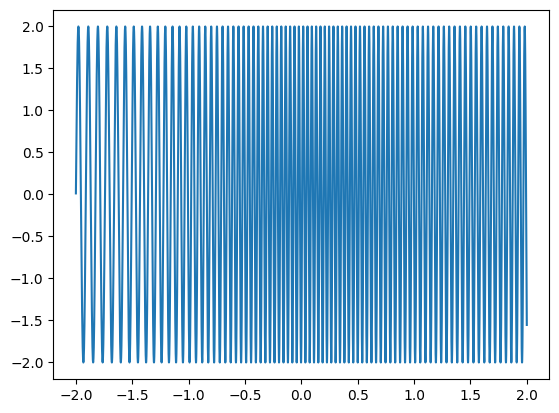

In [201]:
t, signal = get_sin_with_time(fc=10000, A=2.0, a=-2, b=2)
plt.plot(t, signal)

4.69390284177506e-33
1.0049649433217118
(40000,) (50,) (50, 40000)


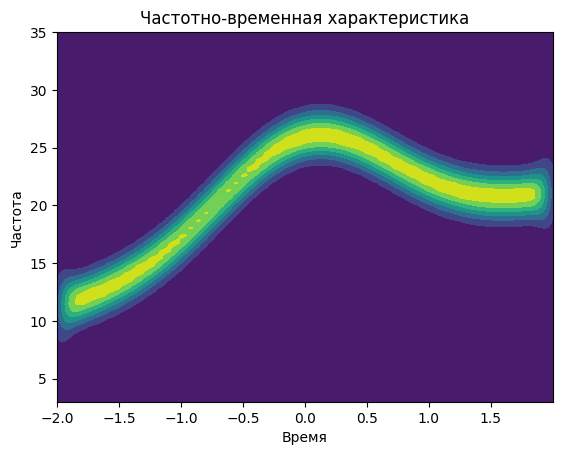

In [202]:
spectrogram(3, 35, signal, t, 'morle')

# 6.

8.32945191034563e-08
0.1277875230570514
(9216,) (50,) (50, 9216)


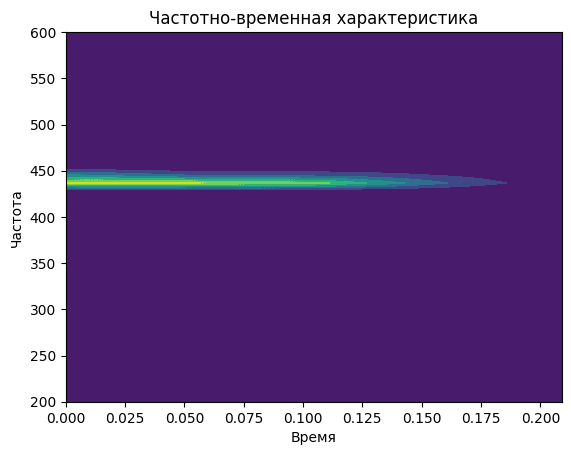

0.0
0.032975610926348625
(9216,) (50,) (50, 9216)


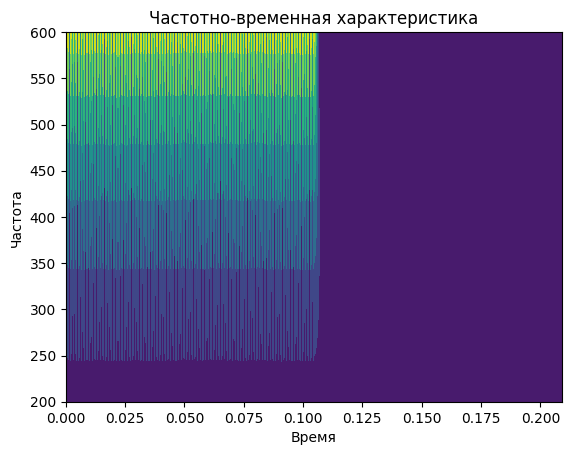

-1.0683178138299572
1.0699497616076283
(9216,) (50,) (50, 9216)


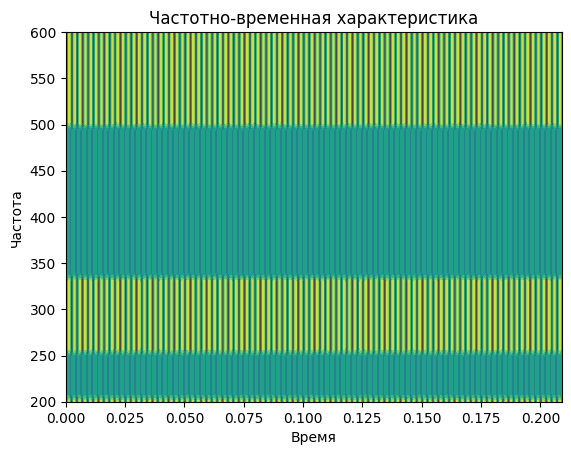

In [206]:
import scipy.io.wavfile as wavfile

rate, signal = wavfile.read('la_cut.wav')

if signal.ndim > 1:
    signal = signal.mean(axis=1)
signal = signal / np.max(np.abs(signal))
time = np.arange(len(signal)) / rate
start_freq = 200
end_freq = 600

# Call the function with 'morle', 'mexh' and 'haar'
spectrogram(start_freq, end_freq, signal, time, type='morle')
spectrogram(start_freq, end_freq, signal, time, type='mexh')
spectrogram(start_freq, end_freq, signal, time, type='haar')